# Ch03 신경망

퍼셉트론은 가중치와 편향을 일일이 조정해야 하는 불편함이 있다.

하지만 신경망은 그런 일을 스스로 함.

3.1 퍼셉트론에서 신경망으로

3.1.1 신경망의 예

그림 3-1 :신경망은 입력층, 은닉층, 출력층으로 구성

3.1.2 퍼셉트론 복습

식 3.1 : 퍼셉트론은 편향과 가중치를 통해 설명됨.

그림 3.3 : 퍼셉트론의 편향을 가시화.

식 3.1을 좀 더 간결히 식 3.2와 식 3.3으로 표현 가능.

3.1.3 활성화 함수

앞서 정의한 $h$를 활성화 함수라고 한다.

그림 3.4 : 활성화 함수 처리 과정

그림 3.5 : 일반적인 뉴런과 활성화 과정을 강조한 뉴런

3.2 활성화 함수

식 3.3 은 step function이다. 
그러면 꼭 활성화 함수를 step function으로만 사용해야하나?
다른 함수도 사용이 가능.

3.2.1 시그모이드 함수

식 3.6 : 시그모이드 함수 정의

3.2.2 step function 구현


In [1]:
#Step function
def step_function(x):
    if x>0:
        return 1
    else :
        return 0

In [2]:
step_function(2),step_function(-1)

(1, 0)

위의 step function은 정의역이 실수밖에 안된다.

$\mathbb{R}^{n}$ 같은 벡터를 인자로 가지려면,,

In [3]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [4]:
step_function(np.array([2,-1])) #각각 원소마다 step function이 적용 되는듯.

array([1, 0])

In [6]:
#위의 코드 풀어보자.
x = np.array([-1, 1, 2])
x

array([-1,  1,  2])

In [6]:
y = x > 0 #넘피 배열에 부등호 연산을 취하면 원소 각각에 부등호로 bool 연산 수행
y

array([False,  True,  True], dtype=bool)

In [7]:
y = y.astype(np.int) #True, False 타입을 int형 변수로 바꿔줌.
y

array([0, 1, 1])

3.2.3 step function 그래프

그래프 그리기 위해 matplotlib 라이브러리 사용

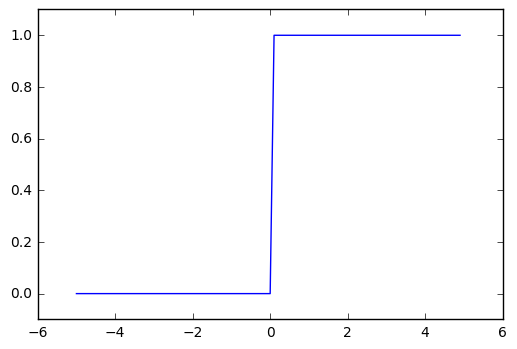

In [9]:
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype=np.int)
    
x = np.arange(-5, 5, 0.1) #-5에서 5까지 0.1 간격의 배열 생성
y = step_function(x)

plt.plot(x,y) #(x,y) 점찍을듯.
plt.ylim(-0.1,1.1) #y축 범위 지정
plt.show()

3.2.4 시그모이드 함수 구현

Similarly 시그모이드 함수도 해보자.

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x가 실수이든 배열이든 상관없이 값을 반환함.

In [11]:
sigmoid(-1)

0.2689414213699951

In [12]:
sigmoid(np.array([-1,1,2]))

array([ 0.26894142,  0.73105858,  0.88079708])

시그모이드 함수 그래프 그려보자

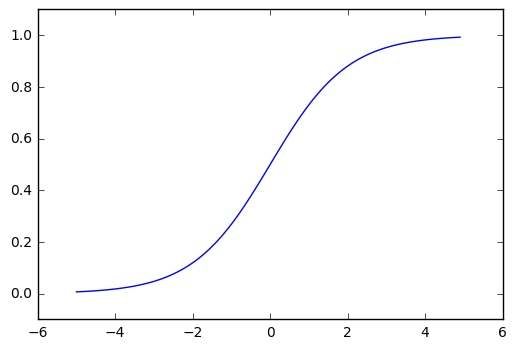

In [13]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

3.2.5 시그모이드 함수와 step function 비교

시그모이드 -> 미분 가능

step function -> 미분 불능

3.2.6 비선형 함수

시그모이드, step function 둘다 비선형 함수인데, 신경망에서 사용되는 활성함수는 주로 비선형 함수를 사용한다.

활성함수로 선형함수를 사용하게 되면 층을 여러개하는 의미가 사라짐.
(여러개로 해도 곧 하나의 선형함수로 표현이 가능함)

3.2.7 ReLu 함수

Rectified Linear Unit(렐루) 함수, 최근에 많이 사용됨.

식 3.7 처럼 나타나고 그래프는 그림 3.9


In [14]:
#Re Lu 함수 구현
def relu(x):
    return np.maximum(0,x) #우리가 아는 그 max다.

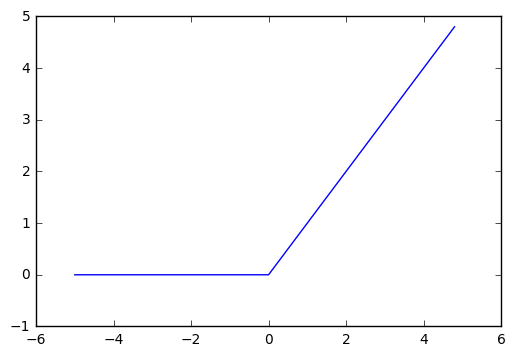

In [15]:
#Re Lu 함수 그래프
x = np.arange(-5, 5, 0.2)
y = relu(x)
plt.plot(x,y)
plt.ylim(-1,5)
plt.show()

3.3 다차원 배열의 계산

np.array를 잘 이용하면 신경망을 효율적으로 구현 가능.

3.3.1 다차원 배열

1차원 배열(벡터) 2차원 배열(행렬) 3차원 배열(큐브를 생각) ... N차원 배열도 생각 가능

In [16]:
import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [17]:
np.ndim(A) # 배열 A의 차원 (여기서는 벡터의 차원이 아니라 배열이 몇개인지 묻는 것)

1

In [21]:
A.shape #배열 속 벡터의 차원을 말하는 듯.

(4,)

In [22]:
A.shape[0]

4

이제 2차원 배열을 생각해보자.

In [18]:
B = np.array([[1,2],[3,4],[5,6]]) #파이썬에서 행렬은 열부터 채워짐
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [19]:
np.ndim(B) #B가 행의 요소 1개 열의 요소 1개 씩 해서 2개가 있으므로

2

In [20]:
B.shape #첫번째 []안에 몇개의 3개의 원소, 각 [] 안에 2개의 원소가 있으므로

(3, 2)

3.3.2 행렬의 내적

그림 3-11: 2x2 행렬 곱 표현.



In [21]:
#행렬의 내적 구현
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A,B) #두 행렬의 곱, 여기서는 행렬의 곱을 행렬의 내적이라고 표현한 듯

array([[19, 22],
       [43, 50]])

행렬을 곱할 때 $\mathbf{R}^{m \times n} \times \mathbf{R}^{n \times r} \rightarrow \mathbf{R}^{m \times r}$ 의 원리를 생각해보면

행렬을 곱할 때 사이즈에 주의해야 한다. 그렇지 않으면 오류가 남. (그림 3-12)

3.3.3 신경망의 내적

그림 3-14 의 신경망을 구현해보자.

$\mathbf{R}^{2}$의 데이터를 넣어서 $\mathbf{R}^{3}$의 데이터가 나와야 하므로 가중치에 해당하는 행렬이 $\mathbf{R}^{3 \times 2}$이 되야함을 알 수있다

In [27]:
X = np.array([1,2]) # (1,2)^T 형태의 데이터
W = np.array([[1,2],[3,4],[5,6]])
Y = np.dot(W,X)
print(Y)

[ 5 11 17]


3.4 3층 신경망 구현

지금까지 입력층(0층) 히든(1층) 결과(2층) 해서 총 2층 신경망을 했다.

이번엔 히든을 2개 넣어서 3층 신경망을 구현해보자 (그림 3-15)

3.4.1 표기법 설명

신경망의 계산을 행렬로 처리할려고 한다.

${w}_{ij}^{(k)}$ $:~~$j번째 노드에서 i번째로 가는 k층에서의 가중치

3.4.2 각 층의 신호 전달 구현

그림 3-17 : 입력층에서 1층으로 감 ${w}_{1j}^{(1)}$ 에 해당함

그림에 해당하는 식을 나타내면 [식 3.8] $~~{a}_{1}^{(1)} = {w}_{11}^{(1)}{x}_{1}+{w}_{12}^{(1)}{x}_{2}+{b}_{1}^{(1)}$

이걸 행렬로 나타내면, ${A}^{(1)}=\mathbf{W}^{(1)}\mathbf{X}+\mathbf{B}^{(1)}$ 으로 나타낼 수 있다

where $\mathbf{A}^{(1)}=\begin{pmatrix} {a}_{1}^{(1)} \\ {a}_{2}^{(1)} \\ {a}_{3}^{(1)} \end{pmatrix}
 ~~~ \mathbf{X}=\begin{pmatrix} {x}_{1} \\ {x}_{2}\end{pmatrix}
 ~~~ \mathbf{B}^{(1)}=\begin{pmatrix} {b}_{1}^{(1)} \\ {b}_{2}^{(1)} \\ {b}_{3}^{(1)} \end{pmatrix}
 ~~~ \mathbf{W}^{(1)}=\begin{pmatrix} {w}_{11}^{(1)} & {w}_{12}^{(1)} \\ {w}_{21}^{(1)} & {w}_{22}^{(1)} \\ {w}_{31}^{(1)} & {w}_{32}^{(1)} \end{pmatrix}$

(책이랑은 Notation이 좀 다름. 수학에서 익숙한 기호로 바꿈)

이 상황을 구현해보자


 $\mathbf{A}^{(1)}=\begin{pmatrix} {a}_{1}^{(1)} \\ {a}_{2}^{(1)} \\ {a}_{3}^{(1)} \end{pmatrix}$

In [28]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.2],[0.3, 0.4],[0.5, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(W1,X)+B1
print(A1)

[ 0.3  0.7  1.1]


위의 코드 과정을 거쳐 그림 3-18 처럼 각 노드가 활성화 함수로 인해 활성화 될지 안될지가 결정이 된다.


In [29]:
Z1 = sigmoid(A1)

print(Z1)

[ 0.57444252  0.66818777  0.75026011]


이제 1층에서 2층으로 가는 신경망을 구현해보자.

그림 3-19를 식으로 나타내면,

$\mathbf{A}^{(2)}=\mathbf{W}^{(2)}\mathbf{Z}_{1}+\mathbf{B}^{(2)}$

In [30]:
W2 = np.array([[0.1, 0.2, 0.3],[0.4, 0.5, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(W2,Z1)+B2
Z2 = sigmoid(A2)

print('A2는 {}\nZ2는 {}'.format(A2,Z2))

A2는 [ 0.51615984  1.21402696]
Z2는 [ 0.62624937  0.7710107 ]


이제 2층에서 3층으로 가는 신경망 구현
그림 3-20을 식으로 나타내면,

$\mathbf{A}^{(3)}=\mathbf{W}^{(3)}\mathbf{Z}_{2}+\mathbf{B}^{(3)}$

단, 마지막 층이 이제 출력층이니까 활성화 함수를 identity를 사용하면,

In [31]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.2],[0.3, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(W3,Z2)+B3
Y = identity_function(A3)

print(Y)

[ 0.31682708  0.69627909]


출력층의 활성화 함수는 풀고자 하는 문제에 맞게 설정하면 된다. 

어떤 문제에 어떤 활성화 함수를 쓸건지는 나중에 다시 설명.

3.4.3 구현 정리

앞선 3층의 신경망을 정리해보면

In [32]:
def init_network():
    network={}
    network['W1']= np.array([[0.1, 0.2],[0.3, 0.4],[0.5, 0.6]])
    network['W2']= np.array([[0.1, 0.2, 0.3],[0.4, 0.5, 0.6]])
    network['W3']= np.array([[0.1, 0.2],[0.3, 0.4]]) 
    network['b1']= np.array([0.1, 0.2, 0.3])
    network['b2']= np.array([0.1, 0.2]) 
    network['b3']= np.array([0.1, 0.2]) 
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(W1,x)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(W2,z1)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(W3,z2)+b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

print(y)

[ 0.31682708  0.69627909]


위의 코드에서 가중치만 적절히 조절하면, 아주 간단한 3층 신경망 모델이 완성되었다.

신경망 모델의 이름을 forward (앞으로)으로 한것은 

신경망의 진행방향이 입력층(왼쪽)을 기준으로 출력층(오른쪽)으로 가는 방향을 forward로 하기 위해서이다.

뒤에 backpropagation(?)을 염두에 두고 한 말 같음.

3.5 출력층 설계하기

신경망은 회귀, 분류 둘 다 사용 가능한데,

각각 출력층에서 활성함수를 다른걸로 사용한다.

회귀는 주로 항등함수를 사용하고 분류는 softmax 함수를 사용함.

3.5.1 항등함수와 softmax 함수 구현

항등 함수는 $\mathbf{I(x)=x}$ 이고,

softmax 함수는 식 3.10 $\mathbf{y}_{k} = \frac{exp(\mathbf{a}_{k})}{\sum exp(\mathbf{a}_{i})}$ 으로 나타난다.

그림 3-22 softmax 함수 설명


In [29]:
#softmax 함수 구현

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a) #벡터 원소의 합
    y = exp_a / sum_exp_a #원소 별로 스칼라가 들어감.
    return y

a = np.array([0.3, 2.9, 4])

print(softmax(a))

[ 0.01821127  0.24519181  0.73659691]


3.5.2 소프트맥스 함수 구현 시 주의점

exp함수는 지수함수라 monotone이 아니라 엄청 크게 증가한다. 그래서 컴퓨터가 연산할 수 있는 범위를 초과할 수도 있다.overflow(오버플로)라고 함.

그래서 원래의 값에는 영향을 주진 않지만, 계산의 안정성을 위하여 식을 약간 변형 한다. 간단한 수학이 쓰인다 식[3.11]

식 3.11에 해당하는 내용을 구현해보자.







In [33]:
a = np.array([1010, 1000, 999])
print(softmax(a)) #아마 계산 에러가 나올거다

NameError: name 'softmax' is not defined

In [31]:
c = np.max(a)
print(softmax(a-c)) #여기서는 c값을 빼줌. 값은 달라도 비율은 같을 것이다.

[  9.99937902e-01   4.53971105e-05   1.67006637e-05]


softmax의 값이 얼마인지도 중요하지만 분류문제에서는 softmax의 값이 큰 값으로 분류를 하면 되므로 크기비교만 있으면 된다.

이걸 감안해서 softmax함수를 조금 보정 해보자


In [2]:
#overflow 수정된 softmax 함수
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a) #벡터 원소의 합
    y = exp_a / sum_exp_a #원소 별로 스칼라가 들어감.
    return y


3.5.3 소프트맥스 함수의 특징

출력값의 성분이 모두 0에서 1사이의 값이다.

그리고 출력값의 성분을 모두 더하면 1이다.

이는 확률의 성질과 비슷하다. 그렇다. 소프트맥스 함수는 확률함수로 볼 수도있다.

그래서 분류문제에서 이를 응용할 수 있다.

예를 들어 출력값이 y=(0.2, 0.3, 0.5) 로 나왔다면 입력데이터의 클래스가 1일 확률이 20%, 2일 확률이 30%, 3일 확률이 50%라고 해석할 수 있다.

그런데 소프트맥스 함수는 monotone increasing 함수이므로, 정의역의 값이 크면 함수값도 크다.

그래서 굳이 마지막 출력층에서의 소프트맥스 함수 계산과정은 사실상 생략이 가능하다.

하지만 나중에 모델을 학습시키는 과정에서는 출력과정에서 소프트맥스 함수 계산과정이 필요함. (4장에서 다시 언급)

3.5.4 출력층의 뉴런 수 정하기

분류 문제의 경우에는 클래스의 갯수 = 출력층의 노드 수 [그림 3-22]

3.6 손글씨 숫자 인식

학습단계는 다시 하고 이미 계산된 최적의 모수를 가지고 추론만 해보자. 

이런 과정을 순전파 (forward propagation)이라고 한다.

3.6.1 MNIST 데이터 셋

MNIST(Mixed National Institute of Standards and Technology database)는 손글씨로 쓰여진 숫자 데이터 셋(트레이닝 셋 6만장, 테스트셋 10만장)을 의미한다.





In [1]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist #data.mnist라는 코드 파일 안에 load_mnist라는 함수코드를 불러오라는 뜻

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

#각 데이터의 형상 출력
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000, )
#위의 이녀석들의 의미는...??

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


load_mnist 함수 특징 설명

인수: normalize, flatten, one_hot_label 3가지가 있다. 모두 인자를 bool값(True or False)으로 입력받는다.

normalize : 입력 이미지의 픽셀 값을 0.0~1.0사이의 값으로 정규화 (False 시 0~255로 나옴)

flattern : 이미지를 1차원 배열로 만듬 (False 시 $1 \times 28 \times 28$의 3차원 배열로 나옴)

one_hot_label : 다시.... 원 핫 인코딩??

그러면 MNIST 이미지를 화면으로 불러보자.

그림1![title](/notebooks/da.png)

In [2]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image #이미지를 불러올때 사용되는 모듈


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0] #x_train이란 배열에 첫번째 있는 이미지인듯
label = t_train[0] #그 이미지의 이름??
print(label)  # 5

print(img.shape)  # (784,) 784개의 원소로 이루어진 1차원 배열
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형 -> 1x28x28은 파이썬이 읽지 못하더라. 28x28은 읽는 듯.
print(img.shape)  # (28, 28)

img_show(img)


5
(784,)
(28, 28)


살펴 보아야 할 것이, img를 불러 들일 때 784개의 원소로 이루어진 배열로 불러오지만,

이미지를 불러올 때는 $28 \times 28$로 불러와야 하기 때문에 image.reshape를 해준다.

그리고 지금 이미지를 PIL이란 모듈로 불러오기 때문에, numpy로 저장된 데이터를 PIL용으로 변환 해주어야 하며 그 변환을 Image.fromarray가 한다.

3.6.2 신경망의 추론 처리

이제 이 MNIST 데이터를 신경망으로 부터 추론을 해보자.

각 $28 \times 28$의 이미지 데이터를 784개의 원소로 이루어진 1개의 배열로 입력데이터로 받아서

0~10 까지 숫자를 판별하는 10개의 출력층을 가진 신경망을 구성할 것이다.

그리고 은닉층은 2개로 첫번째는 50개, 두번째는 100개로 뉴런을 배치. (이때 50, 100은 임의로 정함)

In [5]:
# Neural Network 구현

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

    

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()

network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352


코드를 살펴보자.

우선 get_data로 부터 데이터를 우리가 원하는 방식으로 셋팅한다(784개의 원소로 이루어진 1차원 배열, 각 원소가 0~1사이 값)

그리고 predict 함수로 분류를 한다. 이 때 분류 원리는 출력값이 배열로 나오는데 배열 중 가장 숫자가 큰 즉, 가장 확률이 큰 값으로 분류를 함.

그 배열중 가장 큰 값을 뽑아내는 함수가 np.argmax()이다.

그리고 총 데이터의 갯수중 정답이 맞은 횟수를 통해 accuracy를 출력한다.

93.52%의 정확도가 나오는데 뒤에 학습을 시켜서 99%까지 향상시킬 것이다.

앞서 데이터 배열의 각 원소 값이 0~1사이의 값으로 정규화 시켰는데(원래 0~255값에서) 이렇게 원래 데이터를 특정 변환시키는 과정을 전처리라고 한다.

3.6.3 배치 처리

앞서 $A = WX + B $ 에서의 각 행렬의 사이즈를 생각해보자.

입력 데이터가 784개의 성분을 가진 데이터이니까



In [23]:
x, _ = get_data()
network = init_network()

W1,W2,W3 = network['W1'], network['W2'], network['W3']

print("x.shape 는 {}\nx[0].shape 는 {}\nW1.shape 는 {}\nW2.shape 는 {}\nW3.shape는 {}". format(x.shape, x[0].shape, W1.shape, W2.shape, W3.shape))

x.shape 는 (10000, 784)
x[0].shape 는 (784,)
W1.shape 는 (784, 50)
W2.shape 는 (50, 100)
W3.shape는 (100, 10)


그림 3-26 처럼 행렬 곱이 well-defined 된다.

그러면 같은 원리로 X를 $ 784 \times 1 $ 행렬이 아니라

$ 784 \times 100 $ 행렬을 입력해도 괜찮지 않을까?  (1열이 첫번째 데이터 .... 100열은 100번째 데이터 생각)

그러면 이론적으로는 그림 3-27이 된다 (책에서의 행렬표시에 모두 transpose를 취하면 수학적 표현과 맞다)

이처럼 입력데이터를 몇개의 단위로 묶는 것을 배치라고 한다.

사실 컴퓨터는 하나를 계산하는것 보다 배치로 계산하는게 더 빠르게 설계되어있다고 한다.

배치를 고려해서 다시 구현해보자

In [24]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치의 크기는 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size): #0에서 len(x) 까지 batch_size만큼 끊어라
    x_batch = x[i:i+batch_size] # 784 x 100 행렬
    y_batch = predict(network, x_batch) #결과는 10 x 100 행렬이 나온다 여기선 100 x 10 행렬
    p = np.argmax(y_batch, axis=1) # 첫번째 행 중에 가장 큰 숫자
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
    
    

Accuracy:0.9352


여기서 잠깐 반복문에 range를 살펴보고 가자. 

위에서 설명했듯이 range(start, end, step)으로 이루어져있다. 

In [28]:
list(range(0, 10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [29]:
list(range(0,10,3))

[0, 3, 6, 9]

그리고 배열에서의 argmax는 어떻게 되는지 생각해보면, axis=1이라는 것은 $100 \times 10$을 구성하는 첫번째 차원에서 가장 큰 index를 출력한다

In [30]:
x = np.array([[0.1, 0.8, 0.1],[0.3, 0.1, 0.6],[0.2, 0.5, 0.3],[0.8, 0.1, 0.1]]) # 4x3 행렬
y = np.argmax(x, axis=1) #1행 중가장 큰 수를 나타내는 index!

print(y)

[1 2 1 0]


실제 답과 비교하기 위해서 

In [31]:
t = np.array([1,2,0,0])
print(y==t)

[ True  True False  True]


In [32]:
np.sum(y==t)

3

총 3개 맞았다.

3.7 정리

입력층을 출발로 출력층으로 가는 알고리즘의 순서는 퍼셉트론과 같다.

하지만 퍼셉트론은 활성화 함수를 step function으로 사용한 반면에,

신경망은 활성화 함수를 부드러운 시그모이드 함수를 사용했다.

왜 이렇게 나뉘는지 다음장에서 살펴보자.

3장 총 정리

신경망에서는 활성화 함수로 시그모이드 함수와 ReLu 함수를 주로 이용.

Numpy의 배열을 잘 이용하면 좀 더 효율적으로 신경망 구현 가능.

기계학습은 크게 regression(회귀)와 classification(분류)로 나눌 수 있음.

출력층의 활성화 함수로 회귀에서는 주로 항등함수, 분류에서는 주로 소프트맥스 함수 사용.

분류에서는 출력층의 뉴런(노드)의 수를 클래스의 수와 같게 설정.

입력데이터를 묶은 것을 배치라고 하며, 배치단위로 데이터를 처리하면 좀 더 효율적임.
